In [8]:
import numpy, scipy, matplotlib.pyplot as plt, urllib, IPython.display, librosa, mir_eval

[&larr; Back to Index](index.html)

# Tonal Descriptors: Pitch and Chroma

Download [*Zigeunerweisen*](https://en.wikipedia.org/wiki/Zigeunerweisen) by Pablo de Sarasate.

In [24]:
#urllib.urlretrieve('https://ccrma.stanford.edu/workshops/mir2014/audio/prelude_cmaj_10s.wav', filename='prelude_cmaj_10s.wav')

filename = 'zigeunerweisen.wav'
filename = 'prelude_cmaj_10s.wav'
urllib.urlretrieve('http://audio.musicinformationretrieval.com/' + filename,
                   filename=filename)

('prelude_cmaj_10s.wav', <httplib.HTTPMessage instance at 0x119d8f128>)

Load audio file:

In [26]:
x, fs = librosa.load(filename)
IPython.display.Audio(x, rate=fs)

Compute onsets, play audio signal with onsets superimposed.

In [27]:
onset_frames = librosa.onset.onset_detect(x, sr=fs)
print onset_frames

[ 12  23  33  43  55  65  75  85  96 107 117 127 137 147 158 168 179 189
 200 210 221 231 242 252 260 263 273 284 293 304 314 324 334 345 356 365
 377 386 396 408 417 428]


Convert units from frame indices to time (seconds):

In [28]:
onset_times = librosa.frames_to_time(onset_frames, sr=fs)
print onset_times

[ 0.27863946  0.53405896  0.7662585   0.99845805  1.27709751  1.50929705
  1.7414966   1.97369615  2.22911565  2.48453515  2.71673469  2.94893424
  3.18113379  3.41333333  3.66875283  3.90095238  4.15637188  4.38857143
  4.64399093  4.87619048  5.13160998  5.36380952  5.61922902  5.85142857
  6.03718821  6.10684807  6.33904762  6.59446712  6.80344671  7.05886621
  7.29106576  7.52326531  7.75546485  8.01088435  8.26630385  8.47528345
  8.7539229   8.96290249  9.19510204  9.4737415   9.68272109  9.93814059]


Listen to the computed onsets:

In [29]:
x_with_beeps = mir_eval.sonify.clicks(onset_times, fs, length=len(x))
IPython.display.Audio(x + x_with_beeps, rate=fs)

In [39]:
x, fs = librosa.load(librosa.util.example_audio_file())
IPython.display.Audio(x, rate=fs)

In [41]:
pitches, magnitudes = librosa.piptrack(x, fs)
print pitches

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [54]:
numpy.where(magnitudes>0)


(array([ 28,  28,  28, ..., 496, 675, 675]),
 array([ 29,  33,  89, ..., 806, 178, 179]))

Compute a pitch for each onset-bounded segment.

In [3]:
from essentia.standard import Spectrum
spectrum = Spectrum()

bounds = append(onset_times, (len(audio)/fs))
print bounds.shape
print type(bounds)
bounds_samples = (bounds*fs).astype(int)

pitches = []

def hz2midi(hz):
    return 69 + 12*log2(hz/440.0)

for i in range(len(bounds)-1):
    seg_start = bounds_samples[i]
    seg_end = bounds_samples[i+1]
    seg = audio[seg_start:seg_end]
    frame_sz = len(seg)
    
    if frame_sz % 2 == 1:
        seg = seg[:-1]
        frame_sz = len(seg)
    
    yin = PitchYinFFT(frameSize = frame_sz)
    pitch, pitch_conf = yin(spectrum(seg))
    pitches.append([pitch, frame_sz])

midi_pitches = [[hz2midi(f[0]), f[1]/fs] for f in pitches]
#print midi_pitches

(33,)
<type 'numpy.ndarray'>


Synthesize a new signal comprised of pure sinusoids using the extracted midi pitch values and note durations.

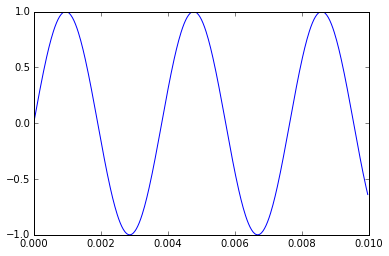

In [4]:
def midi2hz(midi):
    return 440*2**((midi-69)/12.0)

def synth(midi, T, fs):
    
    f0 = midi2hz(midi)
    #print midi, f0
    N = int(T*fs)
    n = arange(N)
    t = n/float(fs)
    return t, sin(2*pi*f0*t)

t, y = synth(60, 0.01, fs)
plot(t, y)

z = concatenate([synth(int(p[0]), p[1], fs)[1] for p in midi_pitches])

audio_trim = audio[len(audio)-len(z):]
z_stereo = array([z, audio_trim])
#print z.shape, type(z)
#print audio.shape
#print audio_trim.shape, type(audio_trim)
#print z_stereo.shape
Audio(z_stereo.sum(axis=0), rate=fs)

[&larr; Back to Index](index.html)